## Necessary libraries imported

In [88]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from bs4 import BeautifulSoup
from collections import Counter

### import processed data from RatingPredictor file

In [89]:
import import_ipynb
import RatingPredictor

In [90]:
%store -r ds_train

In [46]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amitkulkarni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Analysis

In [91]:
#sentiment analysis
sent_list=list(ds_train['reviews'])

sia=SentimentIntensityAnalyzer()
sentiments=[]
#function to classify review as negative, positive or neutral as per the polarity score
def sentiment_analysis(review_text):
    score=sia.polarity_scores(review_text)
    if score['neg']>score['pos']:
        sentiments.append('negative')
    elif score['neg']<score['pos']:
        sentiments.append('positive')
    else:
        sentiments.append('neutral')

In [92]:
for i in sent_list:
    sentiment_analysis(i)
ds_train['sentiments']=sentiments

star
4    2222
5    1485
3     339
1     119
2      37
Name: count, dtype: int64


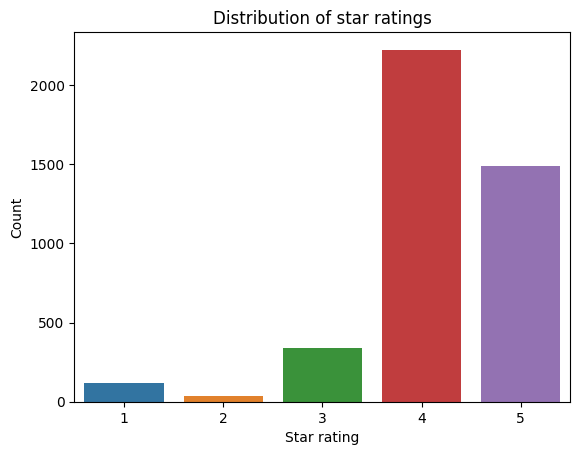

In [93]:
print(ds_train['star'].value_counts())
# create a count plot of the 'star' column
sns.countplot(x='star', data=ds_train)
# add labels and title to the plot
plt.xlabel('Star rating')
plt.ylabel('Count')
plt.title('Distribution of star ratings')
plt.show()

sentiments
positive    3490
negative     460
neutral      252
Name: count, dtype: int64


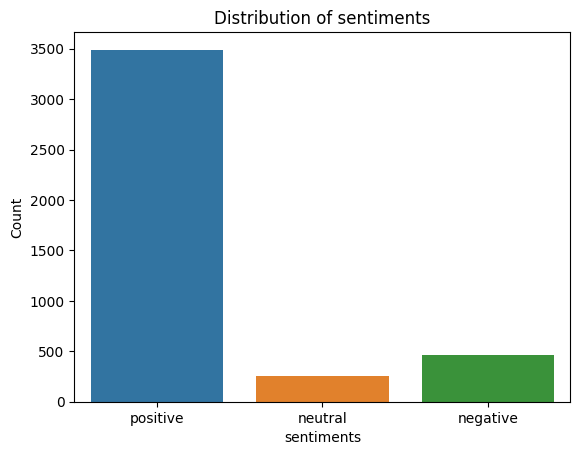

In [50]:
print(ds_train['sentiments'].value_counts())
# create a count plot of the 'star' column
sns.countplot(x='sentiments', data=ds_train)
# add labels and title to the plot
plt.xlabel('sentiments')
plt.ylabel('Count')
plt.title('Distribution of sentiments')
plt.show()

In [94]:
ds_train.head()

,star,reviews,sentiments
0,4,good performance in this range read more,positive
1,4,nice read more,positive
2,4,system is ok but battery back up is less than...,positive
3,4,nice look read more,positive
4,4,good read more,positive


## Observations

1. Post seeing the results of sentiment analysis we can clearly devise that positive reviews are in abundance.
2. Neutral reviews or reviews with scores 2 and 3 are less, so model finalization must depend on accuracy and precision to predict these values/ ratings.

## Loud Words Checking

In [95]:
#defining lists of different classes so that loud words can be checked
list_1=[]
list_2=[]
list_3=[]
list_4=[]
list_5=[]
for ind in ds_train.index:
    if ds_train['star'][ind]==1:
        list_1.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==2:
        list_2.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==3:
        list_3.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==4:
        list_4.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==5:
        list_5.append(ds_train['reviews'][ind])

In [96]:
%store list_1
%store list_2
%store list_3
%store list_4
%store list_5

Stored 'list_1' (list)
Stored 'list_2' (list)
Stored 'list_3' (list)
Stored 'list_4' (list)
Stored 'list_5' (list)


In [97]:
len(list_1)+len(list_2)+len(list_3)+len(list_4)+len(list_5)

4202

In [98]:
ds_train.isnull().sum()

star          0
reviews       0
sentiments    0
dtype: int64

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitkulkarni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True